## Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #UPDATE FEATURES AT THE SAME SCALE
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans  # MARKET SEGMENTATION
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from fcmeans import FCM
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

## Content

- [I.-Exploratory Data Analysis (EDA)](#I.-Exploratory-Data-Analysis-(EDA))
 - [I.1.-Missing Values](#I.1.-Missing-Values)
 - [I.2.-Statistical plots](#I.2.-Statistical-plots)
 - [I.3.-Scaling](#I.3.-Scaling)
- [II.-Determining the number of clusters](#II.-Determining-the-number-of-clusters)
 - [II.1.-Autoencoders](#II.1.-Autoencoders)
 - [II.2.-Principal component analysis (PCA)](#I.2.-Principal-component-analysis-(PCA))
 - [II.3.-Elbow method](#II.3.-Elbow-method)
 - [II.4.-Silhouette Coefficient](#II.4.-Silhouette-Coefficient)
- [III.-Modelling](#III.-Modelling)
 - [III.1.-Score Table](#III.1.-Score-Table)
 - [III.2.-K Means](#III.2.-K-Means)
 - [III.3.-Birch](#III.3.-Birch)

## I.-Exploratory Data Analysis (EDA)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')#open and reading a csv
#path = '/content/CC GENERAL.csv'
#creditcard_df = pd.read_csv(path)
df = pd.read_csv('Marketing_data.csv')

In [3]:
df.shape#checking size of the dataframe

(8950, 18)

In [4]:
df.head() #seeing the first 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()#printing summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()##looking at the five-number summary  of Statistic

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### I.1.-Missing Values

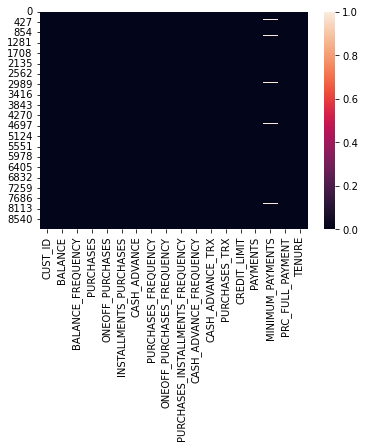

In [7]:
# Visualization of the missing values.
sns.heatmap(df.isnull());

In [8]:
df.isnull().sum()  # Checking missing values.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df['MINIMUM_PAYMENTS'].mean()# Checking mean of the column with missing Values= 'MINIMUM_PAYMENTS'

864.2065423050816

In [10]:
# Localizing the missing values in the column 'MINIMUM_PAYMENTS' and overwriting the mean of the column
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [11]:
#Checking the mean of the column with missing Values= 'CREDIT_LIMIT'
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
# Localizing the missing values in the column 'CREDIT_LIMIT and overwriting the mean of the column
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [13]:
# Checking missing values after the overwriting using mean
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

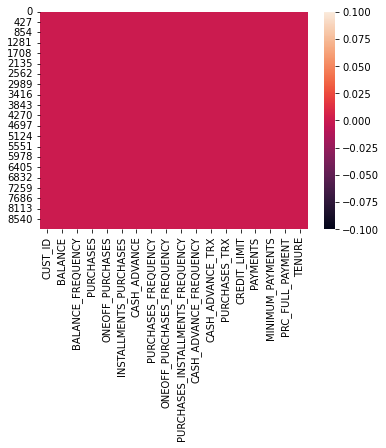

In [14]:
# Visualization of the missing values after the overwriting using mean
sns.heatmap(df.isnull());

In [15]:
## Checking duplicated information
df.duplicated().sum()

0

In [16]:
#dropping 'CUST_ID'columns
df.drop('CUST_ID', axis = 1, inplace = True)

In [17]:
df.head()#looking at first 5 rows  after dropping ID column

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
df.columns#looking at the columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [19]:
len(df.columns)#It has 17 column

17

### I.2.-Statistical plots

mu=1564.4748276781006, sigma=2081.415589510965


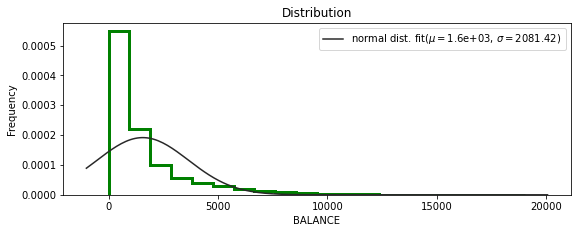

mu=0.8772707255865921, sigma=0.23689076745457388


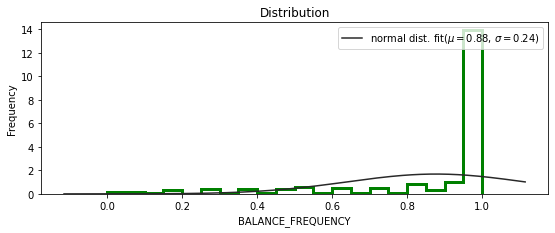

mu=1003.2048335195531, sigma=2136.5154134668696


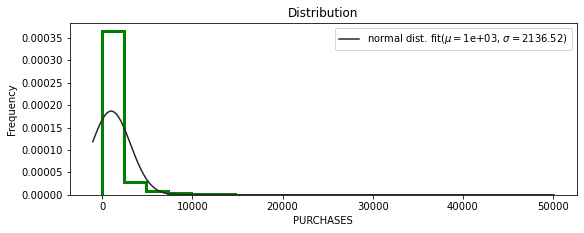

mu=592.4373709497207, sigma=1659.7951836788382


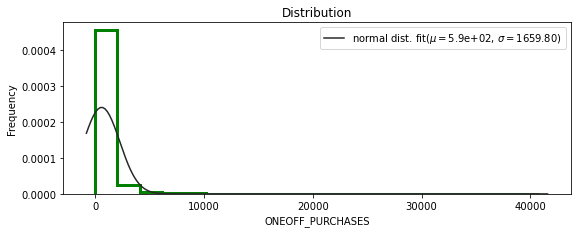

mu=411.0676446927374, sigma=904.2875920816706


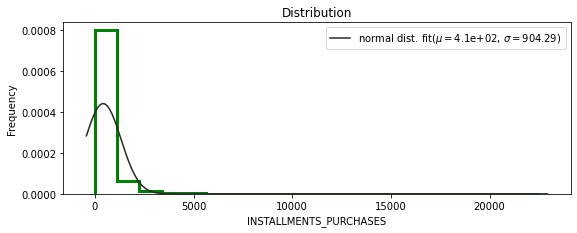

mu=978.8711124654749, sigma=2097.046713377317


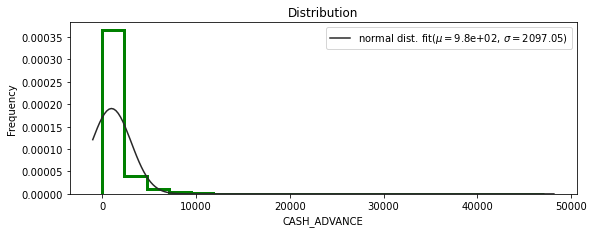

mu=0.49035054837988823, sigma=0.40134832379588636


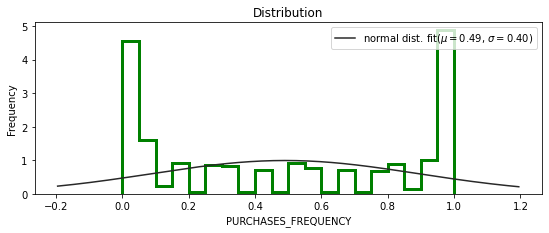

mu=0.202457683575419, sigma=0.2983193978998558


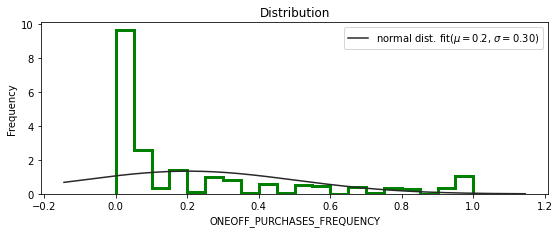

mu=0.3644373415642458, sigma=0.39742557533858297


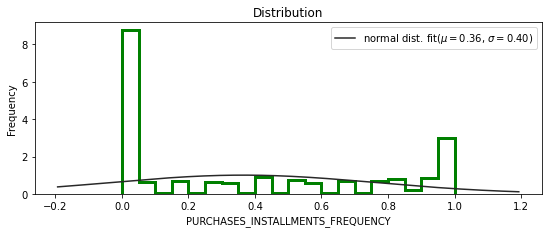

mu=0.13514420033519556, sigma=0.2001102078693716


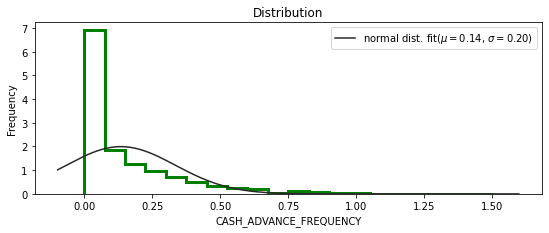

mu=3.2488268156424582, sigma=6.824265468334133


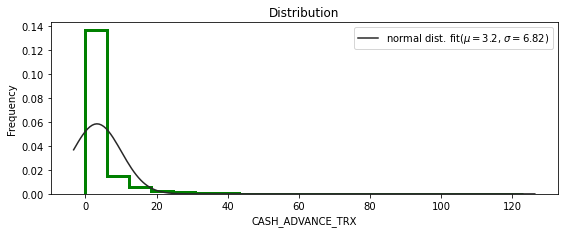

mu=14.709832402234637, sigma=24.856260375611193


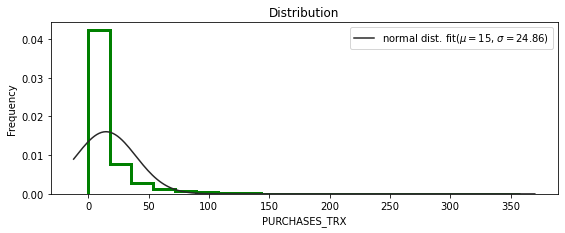

mu=4494.449450364621, sigma=3638.4091311930206


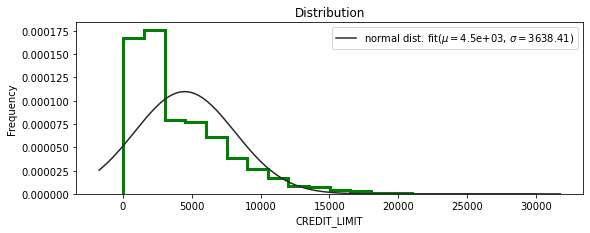

mu=1733.1438520248046, sigma=2894.9020169811592


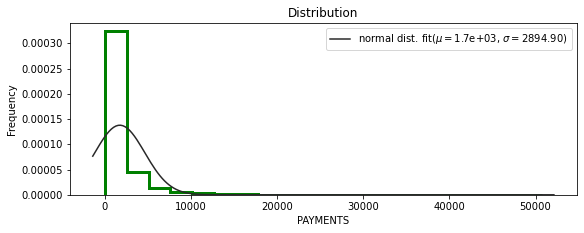

mu=864.2065423050826, sigma=2330.45781710361


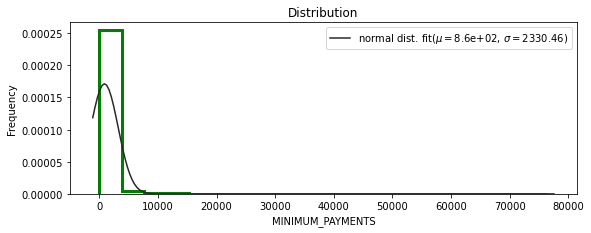

mu=0.15371464849162012, sigma=0.2924828550401881


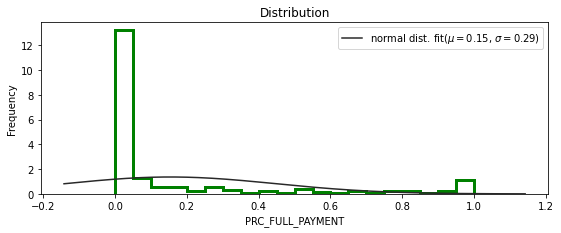

In [20]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
numerical= df.select_dtypes(include=['int64','float64']).columns


for i in range(len(df.columns)-1):
    plt.figure(figsize=(20,60))
    plt.subplot(16, 2, i+1)
    ax= sns.distplot(df[df.columns[i]],fit=stats.norm,  bins=20, kde=False, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(df[df.columns[i]])
    print("mu={0}, sigma={1}".format(mu, sigma)) 
    
     # Legend and labels 
    plt.ylabel(i)
    plt.title('Distribution')
    plt.legend(["normal dist. fit($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
    plt.ylabel('Frequency')
    
   
    plt.show() 


<AxesSubplot:>

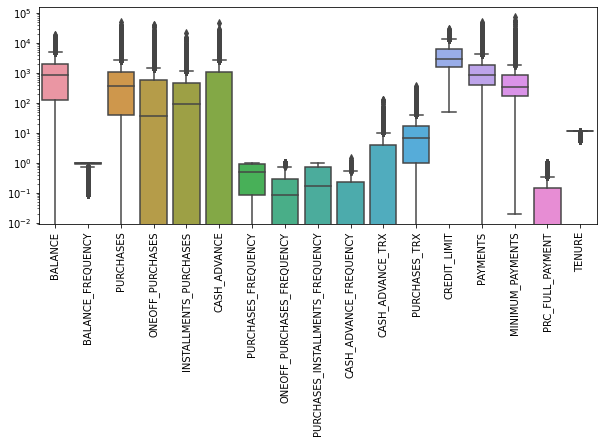

In [21]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=df)

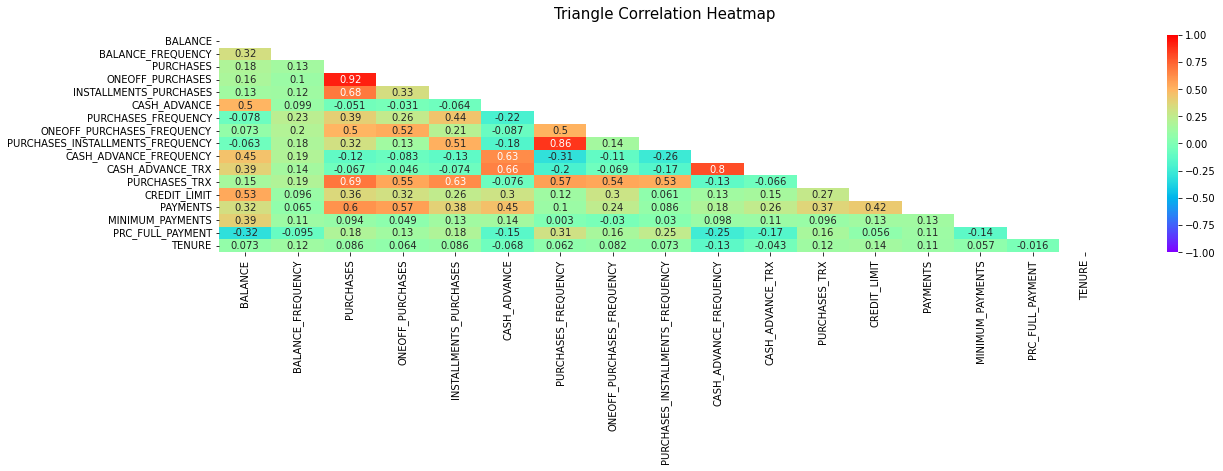

In [22]:
## checking the Pearson correlation
from warnings import filterwarnings #Avoiding warning messages
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

plt.figure(figsize = (20,4))#setting size of figure

#creating a triangle mask with Pearson Correlation
mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=np.bool))

#creating a Heatmap, with Pearson Correlation And adding the triangle mask
heatmap= sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot = True, cmap="rainbow")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=16);#setting title
heatmap.tick_params(labelsize=10)# label size
plt.show()

### I.3.-Scaling

In [23]:
min(df['BALANCE']), max(df['BALANCE']) #The difference in scale is to big. We need to use a scaler to put on the same scaler.

(0.0, 19043.13856)

In [24]:
#Let's use the Standard Scaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [25]:
type(df_scaled), type(df)#looking at the type information of both after and before scaling

(numpy.ndarray, pandas.core.frame.DataFrame)

In [26]:
min(df_scaled[0]), max(df_scaled[0])#Checking the array after scaling

(0.0, 1.0)

In [27]:
df_scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

### I.4.- Normalize Data

https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data/notebook

In [28]:
#df_scaled_norm = normalize(df_scaled)

## II.-Determining the number of clusters

### II.1.-Autoencoders

In [29]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [30]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [31]:
# encoder
encoder = Model(input_df, encoded)

In [32]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [33]:
autoencoder.fit(df_scaled, df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0088
Epoch 2/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0024
Epoch 3/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0021
Epoch 4/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0020
Epoch 5/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0019
Epoch 6/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0019
Epoch 7/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0018
Epoch 8/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0017
Epoch 9/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0015
Epoch 10/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0014
Epoch 11/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 12/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0012
Epoch 13/50
2

In [34]:
df_scaled.shape

(8950, 17)

In [35]:
df_ann = encoder.predict(df_scaled)
df_ann.shape

(8950, 10)

### II.2.-Principal component analysis (PCA)

PCA df
Original shape: (8950, 10)
Reduced shape: (8950, 4)


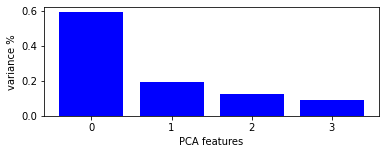

PCA Overview
Total: 4 components
------------------------------
Mean explained variance: 0.25
------------------------------
   explained variance  cumulative
1            0.592373    0.592373
2            0.190587    0.782960
3            0.125053    0.908013
4            0.091987    1.000000
------------------------------


In [36]:
# keep the first principal components of the data
print("PCA df")
pca = PCA(0.995)#n_components = 20
# fit PCA model 
principalComponents = pca.fit(df_ann)
# transform data onto the first two principal components
df_pca = pca.transform(df_ann)#fit the dtaset scaled and passed for ANN  
print("Original shape: {}".format(str(df_ann.shape)))#checking shape
print("Reduced shape: {}".format(str(df_pca.shape)))#checking shape


# Plot the explained variances
plt.figure(figsize=(6, 2))#setting size
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                      index=['explained variance', 'cumulative'],
                                      columns=idx).T
plt.show()

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
# Print explained variance as plain text
print('PCA Overview')
print('='*30)
print("Total: {} components".format(n_components))
print('-'*30)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*30)
print(df_explained_variance.head(20))
print('-'*30)

### II.3.-Elbow Method

In [101]:
distortions = []# the average of the squared distances 
inertias = []#sum of squared distances of samples to their closest cluster center.
map1 = {}
map2 = {}
K= range(1, 4)
for i in K:
    # Building and fitting the model
    Model = KMeans(n_clusters=i).fit(df_pca)
    Model.fit(df_pca)
    label = Model.labels_
 
    distortions.append(sum(np.min(cdist(df_pca, Model.cluster_centers_,
                                        'euclidean'), axis=1)) / df_pca.shape[0])
    inertias.append(Model.inertia_)
 
    map1[i] = sum(np.min(cdist(df_pca, Model.cluster_centers_,
                                   'euclidean'), axis=1)) / df_pca.shape[0]
    map2[i] = Model.inertia_

In [102]:
for key, val in map1.items():
    print(f'{key} : {val}')

1 : 0.6974969919543923
2 : 0.5146419780189229
3 : 0.4484829761910655


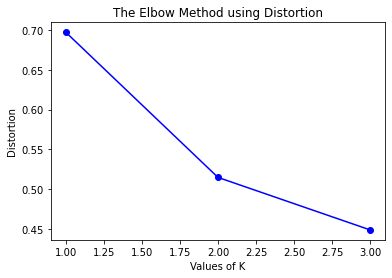

In [103]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [104]:
for key, val in map2.items():
    print(f'{key} : {val}')

1 : 5458.951171875
2 : 3274.595947265625
3 : 2510.539794921875


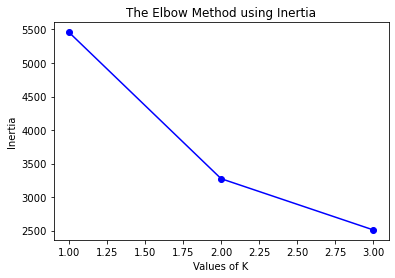

In [105]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### II.4.-Silhouette Coefficient

Silhouette analysis can be used to study the separation distance between the resulting clusters. This measure has a range of [-1, 1].

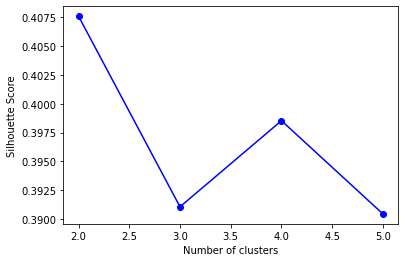

In [106]:
silhouette_scores = [] 

for k in range(2, 6):
    silhouette_scores.append( 
        silhouette_score(df_pca, KMeans(n_clusters = k).fit_predict(df_pca)))
    # Plotting a bar graph to compare the results 
k = [2, 3, 4, 5] 
plt.plot(k, silhouette_scores, "bo-") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 

plt.show() 

## III.-Modelling

https://scikit-learn.org/stable/modules/clustering.html#clustering

In [107]:
x=df_pca

#creating list
models = ['KMeans', 'Agglomerative Clustering',' FCM',
          'GaussianMixture', 'Birch']
k= 2
Cluster = []
Score_Silhouette = []
Score_Calinski_Harabasz = []
Score_Davies_Bouldin = []

Silhouette Score: 0.40731045603752136


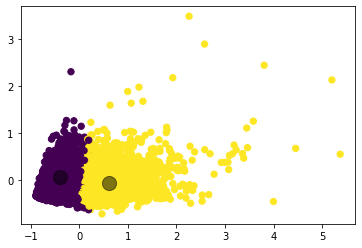

In [108]:
kmeans = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 38)
y_kmeans = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_


# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=y_kmeans, s=40, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# Plotting the centroids of the clusters
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
#plt.legend(loc ="best") 
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append(k)
Score_Silhouette.append(silhouette_score(x, y_kmeans))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, y_kmeans))
Score_Davies_Bouldin.append(davies_bouldin_score(x, y_kmeans))

Silhouette Score: 0.3543142080307007


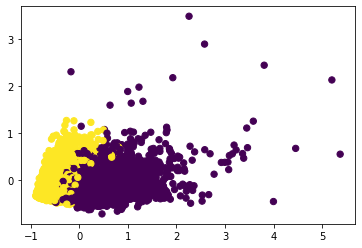

In [109]:
kmeans = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=y_kmeans, s=40, cmap='viridis')

print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x, y_kmeans))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, y_kmeans))
Score_Davies_Bouldin.append(davies_bouldin_score(x, y_kmeans))

Silhouette Score: 0.40627777576446533


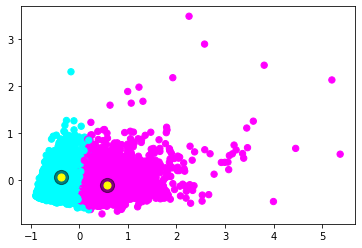

In [110]:
kmeans = FCM(n_clusters =2)
y_kmeans = kmeans.fit(x)
centers = kmeans.centers
# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = kmeans.u.argmax(axis = 1)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=fcm_labels, s=40, cmap='cool')
# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(centers[:, 0], centers[:,1], s = 50, c = 'yellow', label = 'Centroids')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, fcm_labels)}')
# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x, fcm_labels))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, fcm_labels))
Score_Davies_Bouldin.append(davies_bouldin_score(x, fcm_labels))

Silhouette Score: 0.2464720755815506


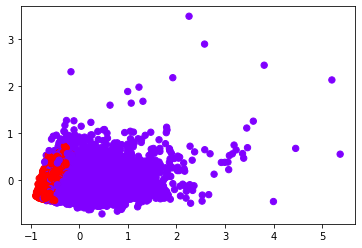

In [111]:
kmeans =  GaussianMixture(n_components=2)
y_kmeans = kmeans.fit(x)
labels= y_kmeans.predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3],c=labels,s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, labels)}')

# Create an additional column in the dataframe 
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x,labels))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, labels))
Score_Davies_Bouldin.append(davies_bouldin_score(x, labels))

Silhouette Score: 0.7408487200737


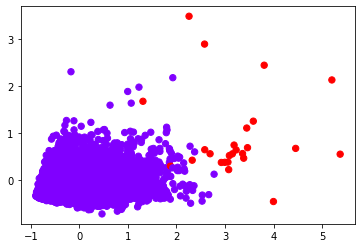

In [112]:
kmeans = Birch(n_clusters=2)
y_kmeans = kmeans.fit(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=kmeans.labels_,  s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, kmeans.labels_)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x, kmeans.labels_))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, kmeans.labels_))
Score_Davies_Bouldin.append(davies_bouldin_score(x, kmeans.labels_))

### III.1.-Scores Table 

In [113]:
allResults= pd.DataFrame()
allResults['Model'] = models
allResults['N° Clusters'] = Cluster
allResults['Silhouette Score'] = Score_Silhouette
allResults['Calinski-Harabasz Score'] = Score_Calinski_Harabasz
allResults['Davies_Bouldin Score'] = Score_Davies_Bouldin
allResults

,Model,N° Clusters,Silhouette Score,Calinski-Harabasz Score,Davies_Bouldin Score
0,KMeans,2,0.407310,5968.867724,1.085139
1,Agglomerative Clustering,2,0.354314,4986.550743,1.107779
2,FCM,2,0.406278,5961.657470,1.082745
3,GaussianMixture,2,0.246472,3370.879577,1.115339
4,Birch,2,0.740849,526.077625,0.643376


* The Silhouette Coefficient goes from -1 to 1. Scores around zero reveals overlapping clusters.
* Calinski-Harabasz index or the Variance Ratio Criterion indicates that highest score is relates to a model with better defined clusters.
* The Davies-Bouldin index evidences where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

How one can appreciete in the table Kmeans and FMC are the algoritms that performance better. We are using 3 cluster for KmMeans and 2 for FCM.

### III.2.-K Means

In [114]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)
kmeans_labels = kmeans.labels_

In [115]:
kmeans_labels, len(kmeans_labels)

(array([1, 1, 0, ..., 0, 1, 1]), 8950)

In [116]:
np.unique(kmeans_labels, return_counts=True)

(array([0, 1]), array([4036, 4914], dtype=int64))

In [117]:
kmeans.cluster_centers_

array([[0.07382684, 0.93669405, 0.03734944, 0.02454818, 0.03694949,
        0.01203059, 0.89291899, 0.33621388, 0.72811427, 0.05181318,
        0.01589547, 0.08051338, 0.1631854 , 0.04064191, 0.0115773 ,
        0.25441817, 0.93337464],
       [0.08899069, 0.82848677, 0.00658913, 0.00631339, 0.00293436,
        0.02793815, 0.15985947, 0.0926497 , 0.06587449, 0.12152477,
        0.03504785, 0.00872315, 0.13625389, 0.02885651, 0.01109135,
        0.07104146, 0.90820617]])

In [118]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.073827,0.936694,0.037349,0.024548,0.036949,0.012031,0.892919,0.336214,0.728114,0.051813,0.015895,0.080513,0.163185,0.040642,0.011577,0.254418,0.933375
1,0.088991,0.828487,0.006589,0.006313,0.002934,0.027938,0.159859,0.092650,0.065874,0.121525,0.035048,0.008723,0.136254,0.028857,0.011091,0.071041,0.908206


In [119]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1405.894783,0.936694,1831.600691,1000.614617,831.363591,567.088657,0.892919,0.336214,0.728114,0.077720,1.955143,28.823792,4937.402789,2061.418008,884.596684,0.254418,11.600248
1,1694.662107,0.828487,323.128071,257.341707,66.023058,1316.926495,0.159859,0.092650,0.065874,0.182287,4.310885,3.122889,4130.804136,1463.645130,847.467128,0.071041,11.449237


In [120]:
labels, len(labels)

(array([1, 1, 0, ..., 0, 1, 0], dtype=int64), 8950)

In [121]:
df1_cluster = pd.concat([df, pd.DataFrame({'KMEANS_CLUSTER': kmeans_labels})], axis = 1)
df1_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


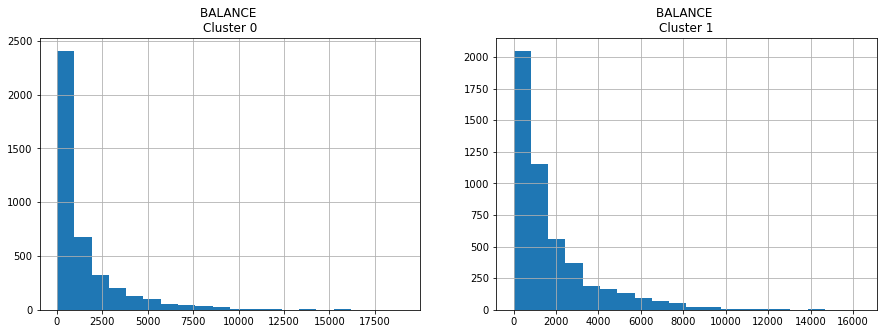

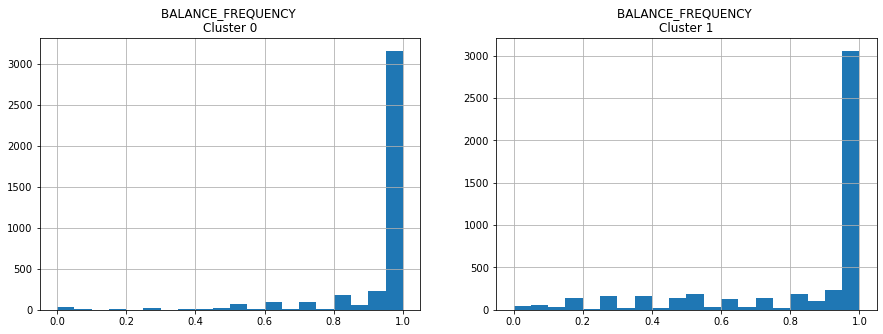

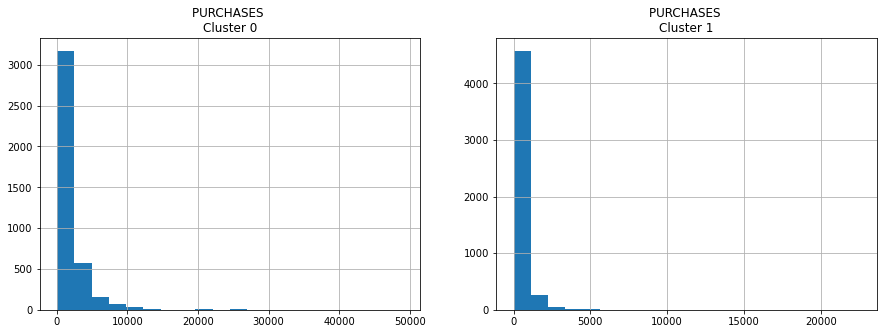

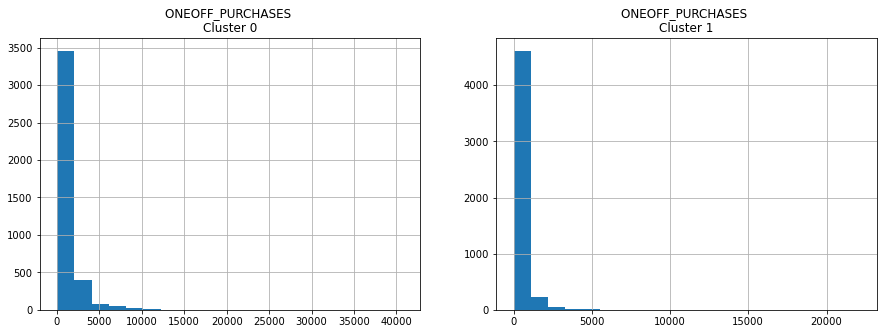

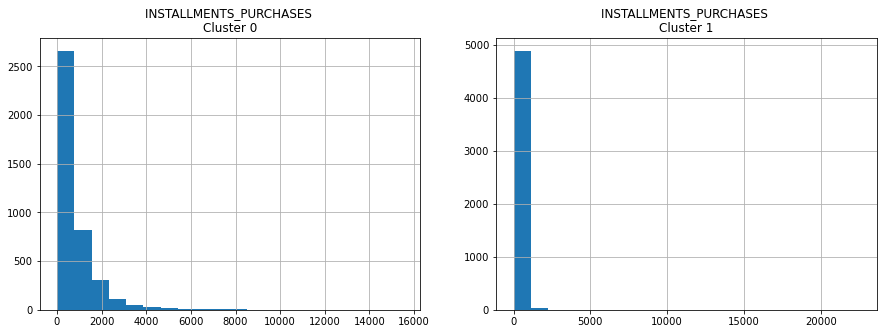

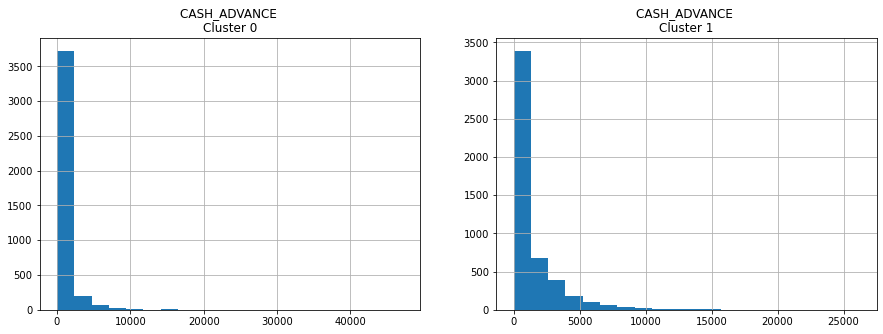

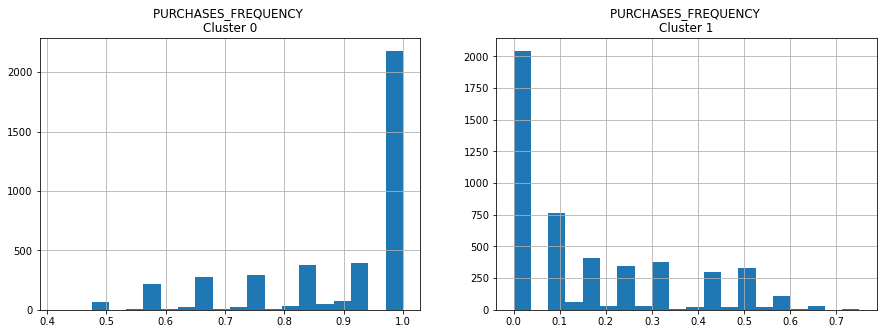

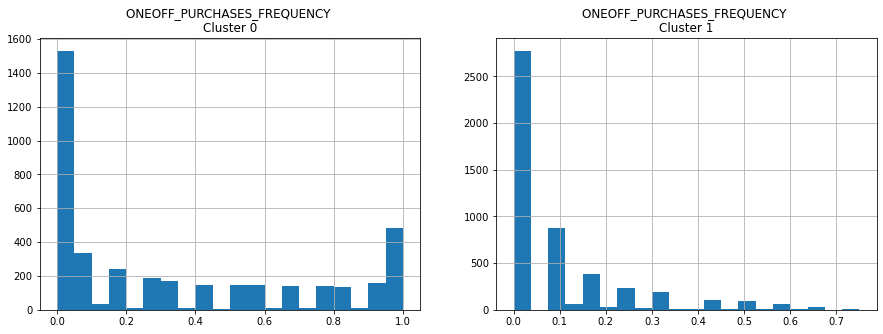

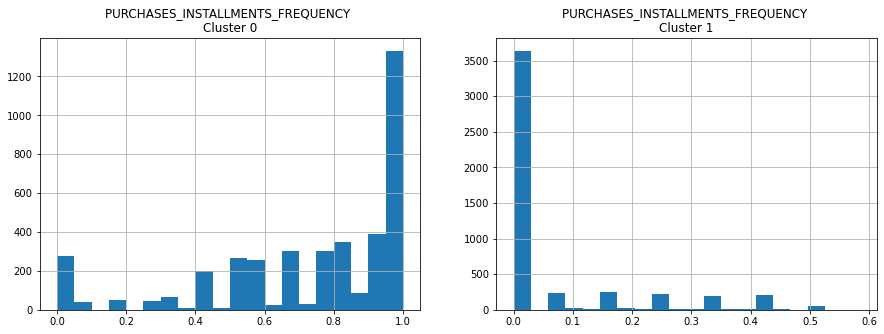

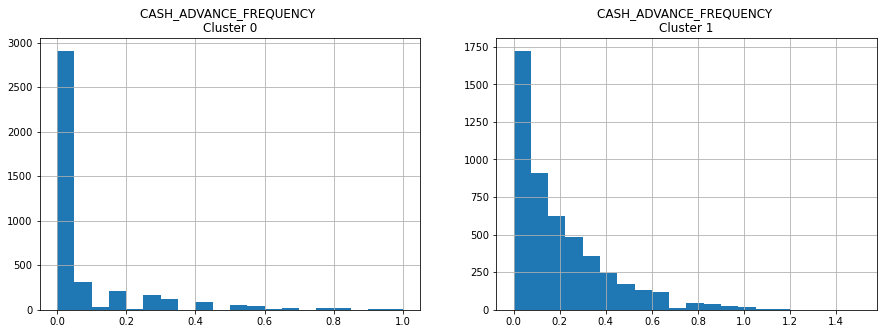

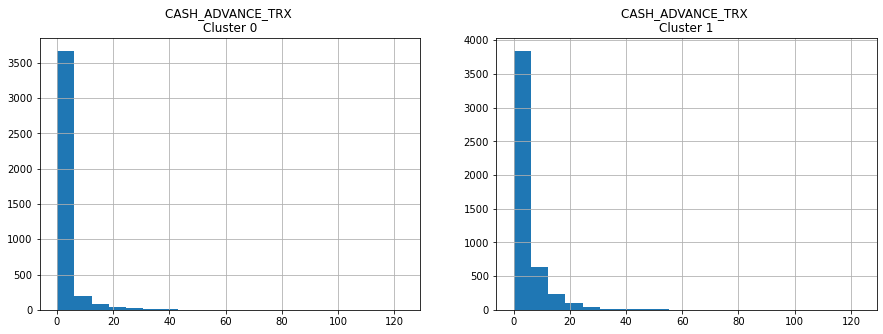

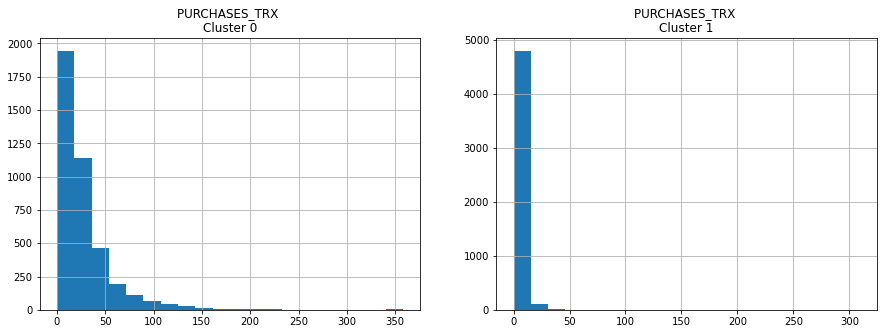

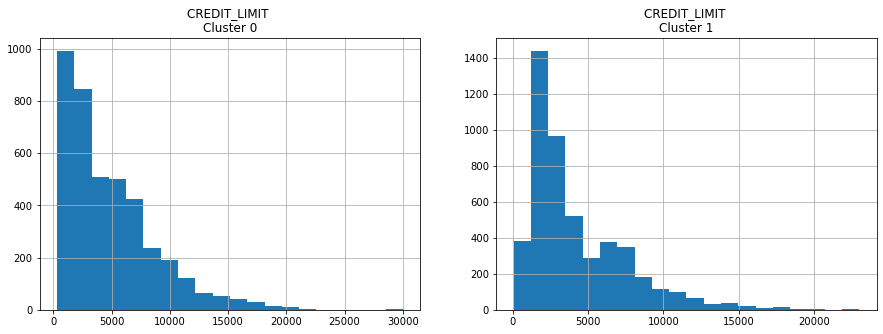

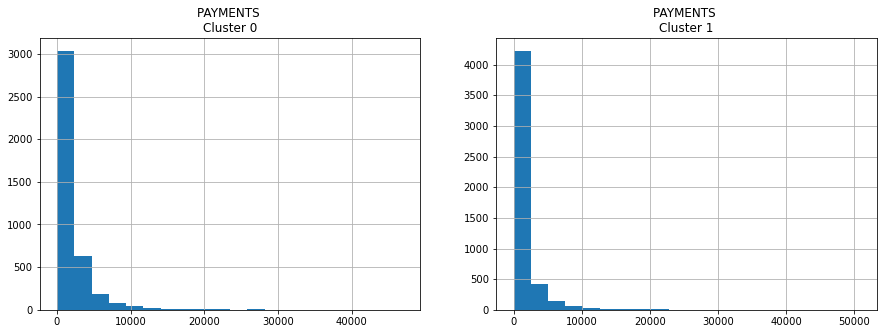

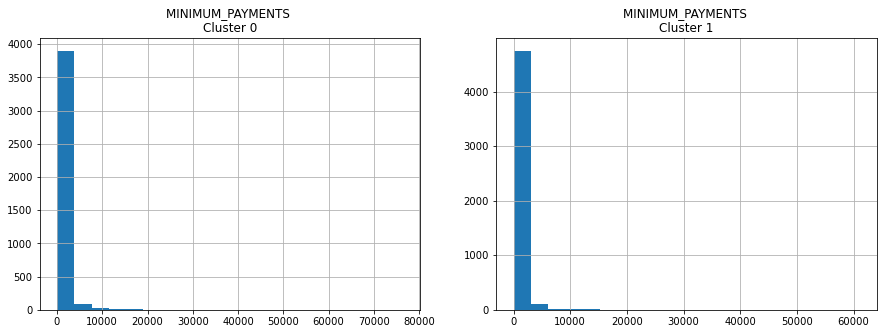

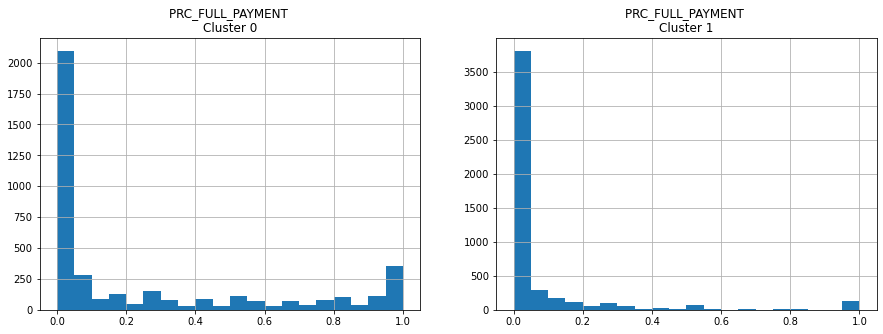

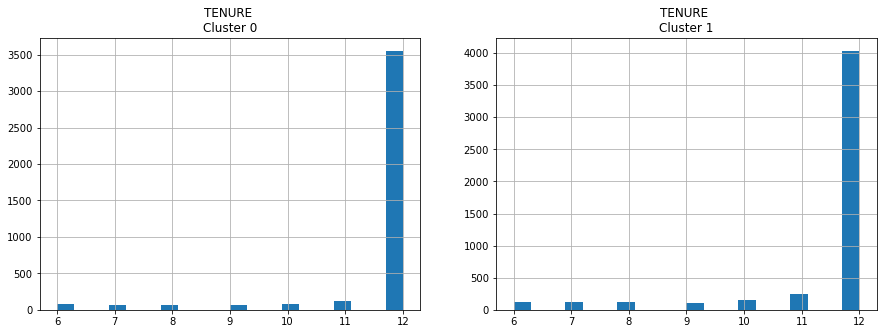

In [122]:
for i in df.columns:
  plt.figure(figsize=(15,5))
  for j in range(2):
    plt.subplot(1, 2, j + 1)
    cluster = df1_cluster[df1_cluster['KMEANS_CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [123]:
df_ordered = df1_cluster.sort_values(by = 'KMEANS_CLUSTER')
df_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
2230,69.141919,1.000000,872.94,137.30,735.64,0.0,0.916667,0.333333,0.916667,0.0,0,24,10000.0,721.050386,167.657169,0.600000,12,0
4958,33.817964,0.909091,232.45,0.00,232.45,0.0,0.833333,0.000000,0.833333,0.0,0,10,1800.0,243.407128,141.988053,0.363636,12,0
2885,600.777518,1.000000,760.38,269.53,490.85,0.0,1.000000,0.166667,1.000000,0.0,0,35,4500.0,829.712416,186.053091,0.000000,12,0
5776,793.213204,1.000000,1011.16,488.99,522.17,0.0,0.833333,0.333333,0.500000,0.0,0,19,1000.0,842.847535,307.591569,0.000000,12,0
7419,1223.630962,1.000000,2065.50,628.80,1436.70,0.0,1.000000,0.166667,1.000000,0.0,0,46,1500.0,638.997243,961.531428,0.000000,12,0


In [124]:
df_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
3949,1211.895212,1.000000,0.00,0.00,0.0,119.377631,0.000000,0.000000,0.0,0.083333,2,0,1200.0,413.575315,938.748553,0.0,12,1
3945,4899.638221,1.000000,0.00,0.00,0.0,424.449434,0.000000,0.000000,0.0,0.272727,5,0,5000.0,880.262447,1651.415614,0.0,11,1
3942,1679.429188,1.000000,0.00,0.00,0.0,75.844786,0.000000,0.000000,0.0,0.166667,2,0,1800.0,243.503331,4511.435479,0.0,12,1
3940,2713.749041,1.000000,0.00,0.00,0.0,318.035084,0.000000,0.000000,0.0,0.333333,4,0,3000.0,664.635735,880.427416,0.0,12,1
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,1


In [125]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-0.48216436, -0.09765617],
       [-0.6085774 , -0.01937946],
       [ 0.30450697,  0.92094554],
       ...,
       [ 0.36038865, -0.42264684],
       [-0.64609505, -0.20433243],
       [-0.09459773,  0.39957787]])

In [126]:
pca_df1 = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df1.head()

,pca1,pca2
0,-0.482164,-0.097656
1,-0.608577,-0.019379
2,0.304507,0.920946
3,-0.588622,-0.005605
4,-0.554354,0.052965


In [127]:
pca_df1 = pd.concat([pca_df1, pd.DataFrame({'KMEANS_CLUSTER': kmeans_labels})], axis = 1)
pca_df1.head()

,pca1,pca2,KMEANS_CLUSTER
0,-0.482164,-0.097656,1
1,-0.608577,-0.019379,1
2,0.304507,0.920946,0
3,-0.588622,-0.005605,1
4,-0.554354,0.052965,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

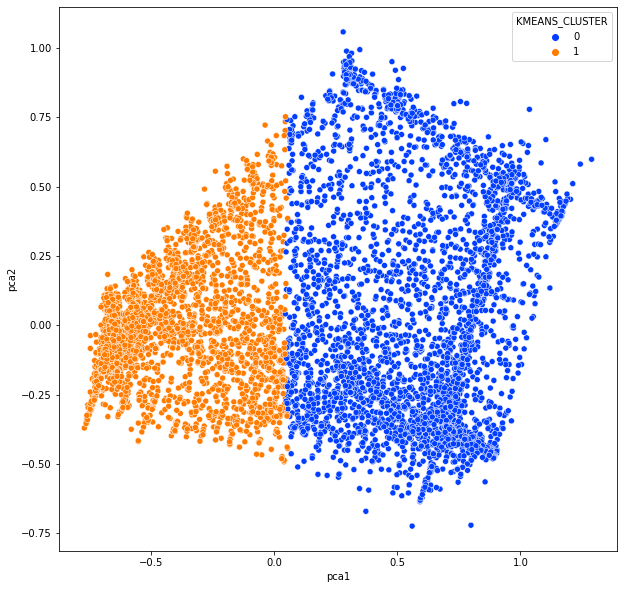

In [128]:
plt.figure(figsize=(10,10))
plt.legend(kmeans_labels)
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'KMEANS_CLUSTER', data = pca_df1, palette = 'bright')

### III.3.- Birch

In [129]:
kmeans = Birch(n_clusters=2, threshold=0.5,
                branching_factor=50, compute_labels=True)
 
y_kmeans = kmeans.fit(df_scaled)
labels_Birch = kmeans.labels_


In [130]:
labels_Birch, len(labels_Birch)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 8950)

In [131]:
np.unique(labels_Birch, return_counts=True)

(array([0, 1], dtype=int64), array([8298,  652], dtype=int64))

In [132]:
Final_cluster = pd.concat([df1_cluster, pd.DataFrame({'BIRCH_CLUSTER': labels_Birch})], axis = 1)
Final_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER,BIRCH_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0


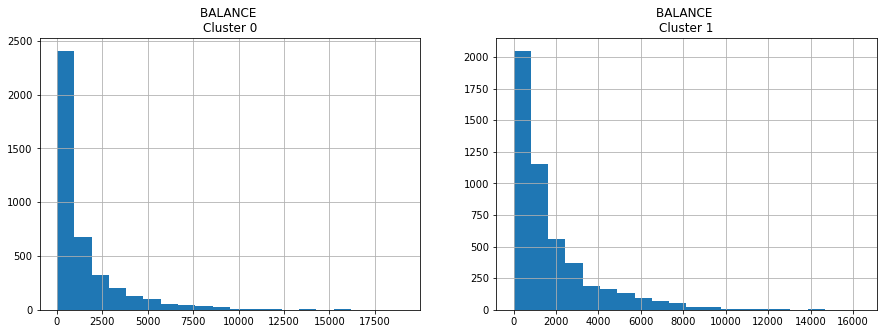

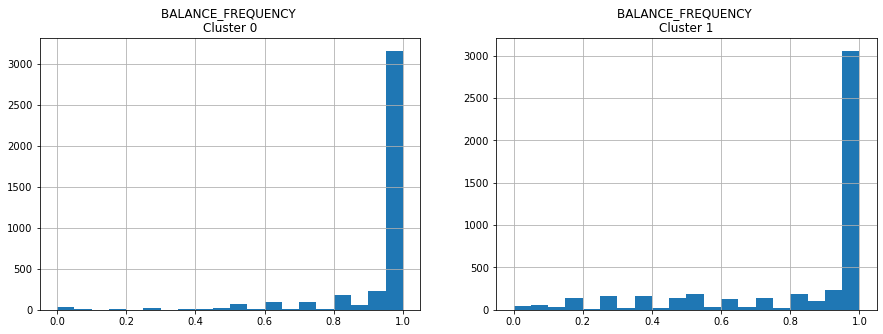

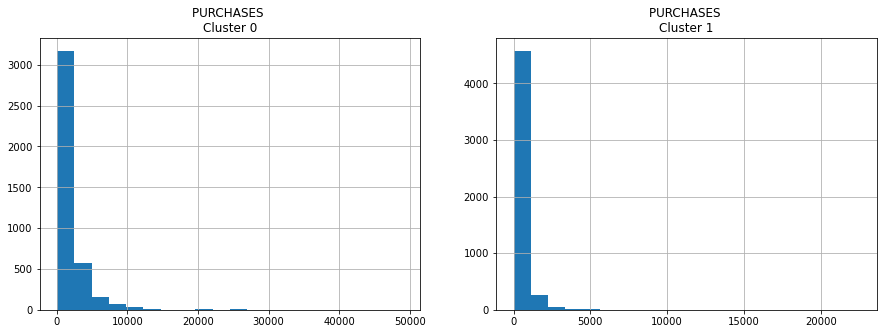

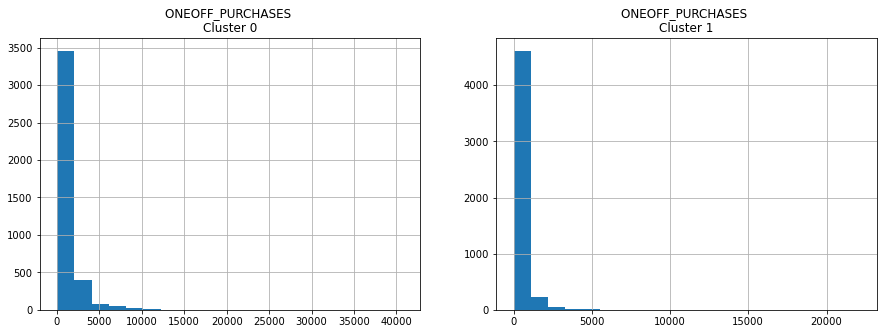

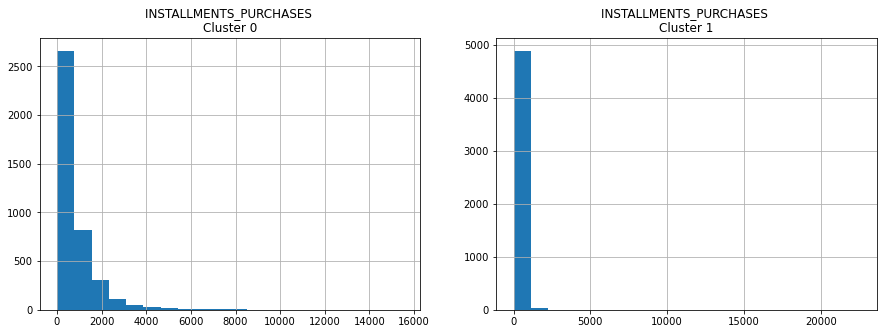

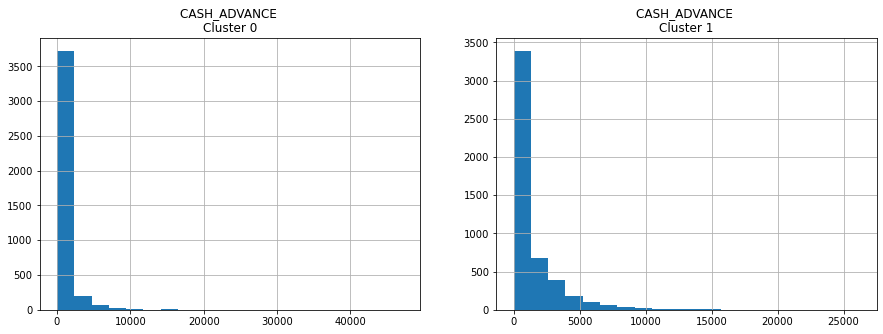

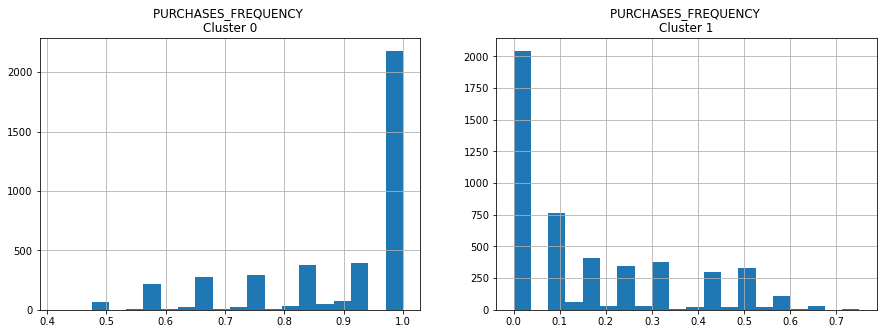

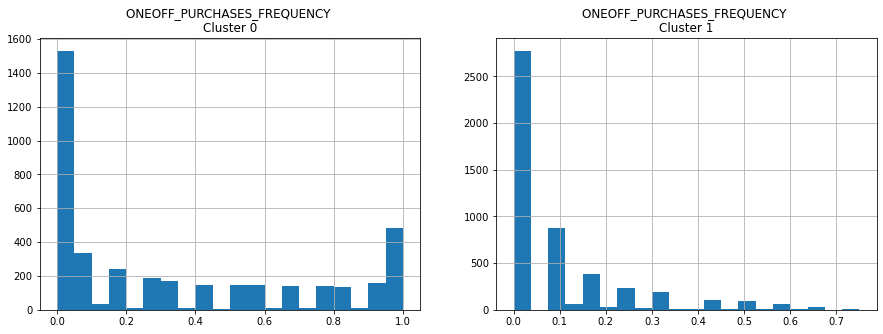

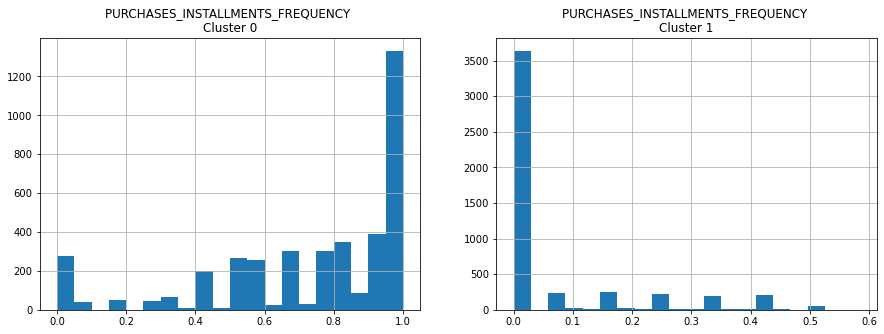

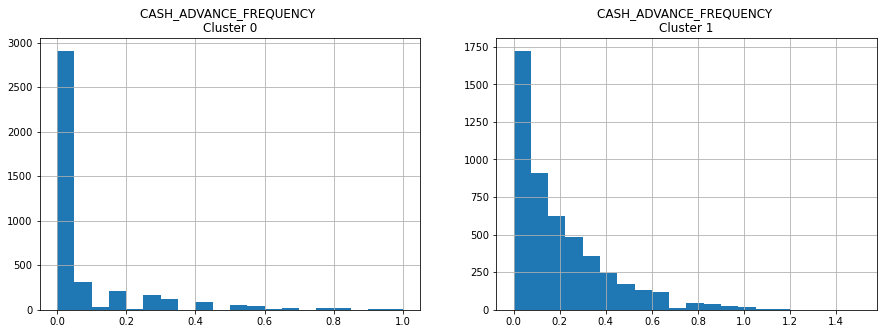

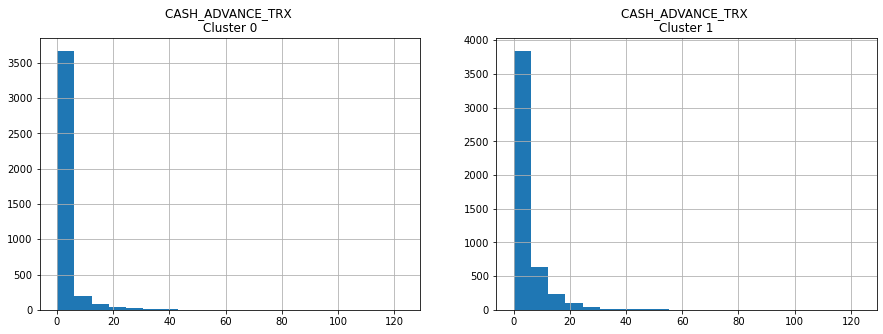

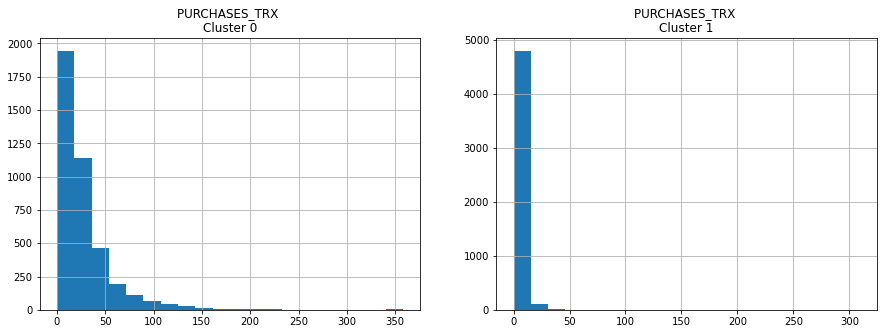

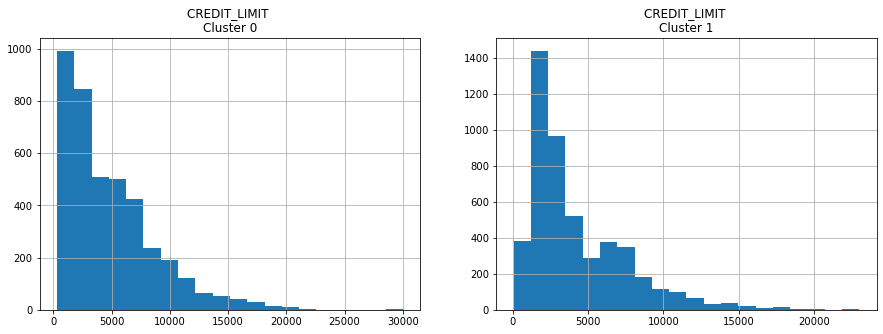

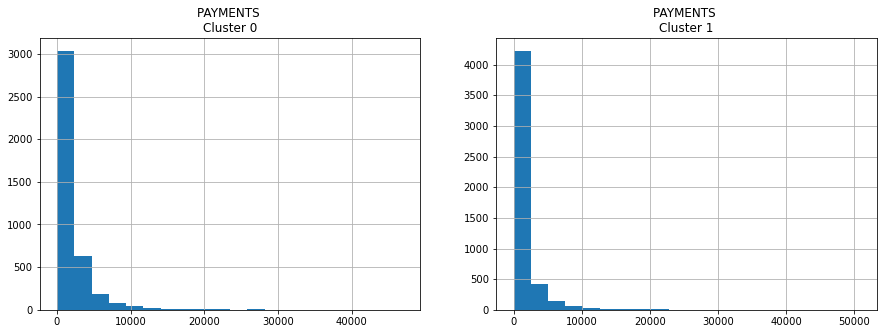

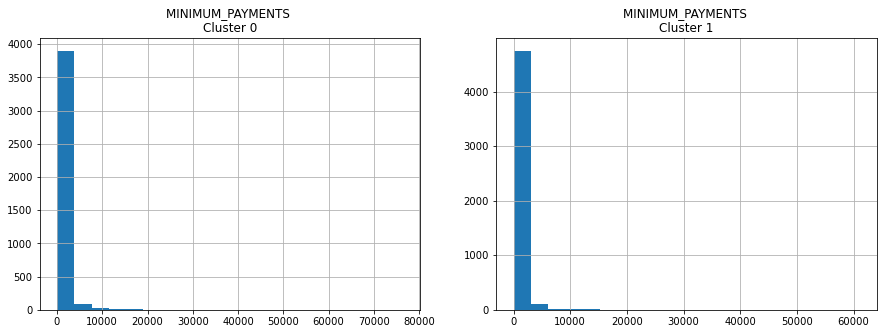

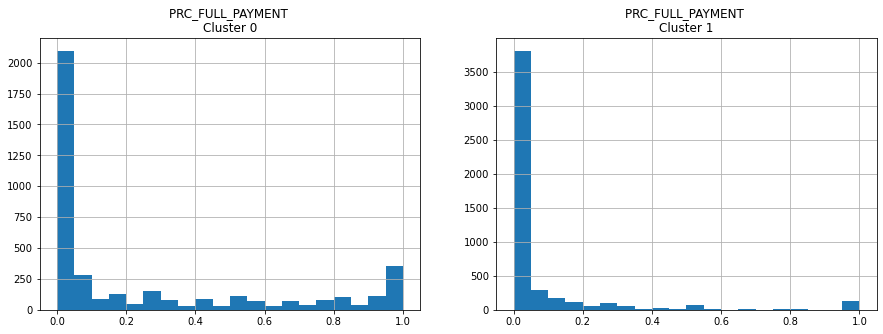

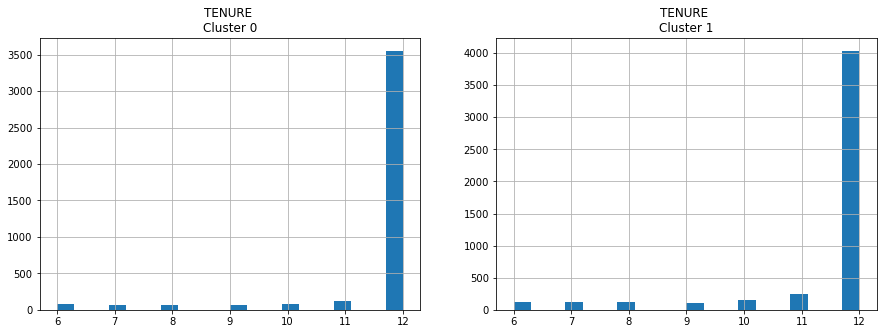

In [133]:
for i in df.columns:
  plt.figure(figsize=(15,5))
  for j in range(2):
    plt.subplot(1, 2, j + 1)
    cluster = Final_cluster[Final_cluster['KMEANS_CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [134]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-0.48216436, -0.09765617],
       [-0.6085774 , -0.01937946],
       [ 0.30450697,  0.92094554],
       ...,
       [ 0.36038865, -0.42264684],
       [-0.64609505, -0.20433243],
       [-0.09459773,  0.39957787]])

In [135]:
pca_df2 = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df2.head()

,pca1,pca2
0,-0.482164,-0.097656
1,-0.608577,-0.019379
2,0.304507,0.920946
3,-0.588622,-0.005605
4,-0.554354,0.052965


In [136]:
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'BIRCH_CLUSTER': labels_Birch})], axis = 1)
pca_df2.head()

,pca1,pca2,BIRCH_CLUSTER
0,-0.482164,-0.097656,0
1,-0.608577,-0.019379,0
2,0.304507,0.920946,0
3,-0.588622,-0.005605,0
4,-0.554354,0.052965,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

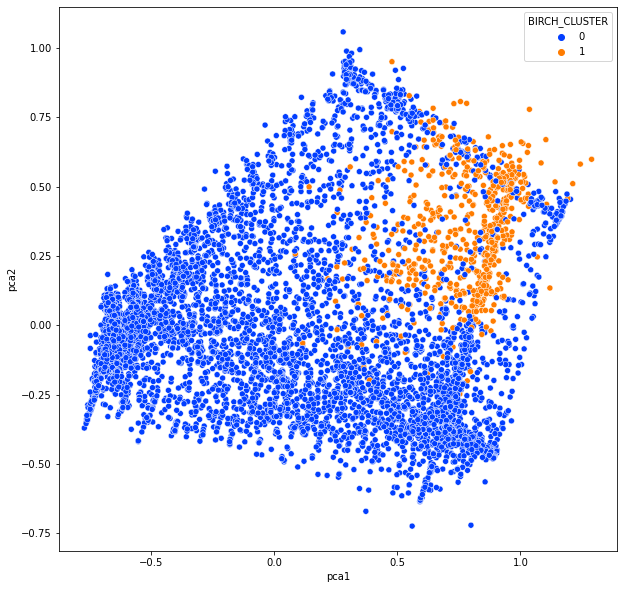

In [137]:
plt.figure(figsize=(10,10))
plt.legend(labels_Birch)
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'BIRCH_CLUSTER', data = pca_df2, palette = 'bright')

https://www.kaggle.com/code/gauravduttakiit/clustering-using-autoencoders-ann